# Stroop Test
# 统计学：决策的科学项目说明
-----------
**在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词；在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。**

In [2]:
import numpy as np
import pandas as pd

stroop_data = pd.read_csv('stroopdata.csv')
stroop_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


**1.我们的自变量是什么？因变量是什么？**
> * 这个实验中的自变量是两组任务中不同的文字特征
> * 因变量是识别并说出同等大小的列表中词语颜色名称的时间

**2.此任务的适当假设集是什么？你想执行什么类型的统计测试？为你的选择提供正当理由。**  

> 对于这个统计实验，我的猜想是:**在一致文字条件下，人们识别出同等大小列表中词语颜色名称的时间少于不一致文字条件的情形**；  
> 因此，我认为这个实验的适当假设集应该表示为：    

> *（用 $μ_C$表示一致文字条件组($Congruent$)的总体均值，用 $μ_I$表示非一致文字条件组($Incongruent$)的总体均值）*       
> 零假设: $H_0:μ_C \geq μ_I$，在一致文字条件下，人们识别出同等大小列表中词语颜色名称的时间不少于不一致文字条件的情形;      
> 备择假设:$H_A:μ_C < μ_I$,在一致文字条件下，人们识别出同等大小列表中词语颜色名称的时间少于不一致文字条件的情形。    

> 在此实验中，我们应该执行的是一个单变量的相依样本*t*检验，原因包括：
* 可以假设该实验的总体遵循正态分布，这是*t*检验的前提；
* 这是一个*n=24*的小样本，且无法知道总体的标准差，不适用*Z*检验；
* 本实验中两组数据来自同样的实验者，属于相依样本；


**3.报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。**    
 >下面调用numpy中计算数组参数的函数，分别计算两组数据的**平均值／中位数／方差／标准差**，保留两位小数并输出

In [3]:
mean_C = np.mean(stroop_data['Congruent'])
medium_C = np.median(stroop_data['Congruent'])
var_C = np.var(stroop_data['Congruent'])
std_C = np.std(stroop_data['Congruent'])

mean_I = np.mean(stroop_data['Incongruent'])
medium_I = np.median(stroop_data['Incongruent'])
var_I = np.var(stroop_data['Incongruent'])
std_I = np.std(stroop_data['Incongruent'])


print("     type\t平均值\t中位数\t方差\t标准差\t\n\
一致文字条件组\t{0:.2f}\t{1:.2f}\t{2:.2f}\t {3:.2f}\t\n\
非一致文字条件组\t{4:.2f}\t{5:.2f}\t{6:.2f}\t {7:.2f}\t\n" 
      .format(mean_C,medium_C,var_C,std_C,mean_I,medium_I,var_I,std_I))


     type	平均值	中位数	方差	标准差	
一致文字条件组	14.05	14.36	12.14	 3.48	
非一致文字条件组	22.02	21.02	22.05	 4.70	



**4.提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。**    
>下方会依次通过绘制箱形图和散点图的方式描述数据的特征。

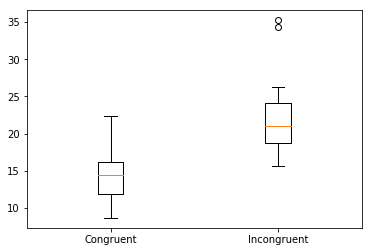

In [78]:
from matplotlib import pyplot

#绘制箱形图
pyplot.boxplot([stroop_data['Congruent'],stroop_data['Incongruent']],labels=['Congruent','Incongruent'])
pyplot.show()

两幅图分别为一致文字条件组和非一致文字条件组的箱形图；
* 一致文字条件组的总体均值比非一致文字条件组小得多；
* 两组数据的四分位差比较接近，发散程度差不多；
* 非一致文字条件组出现了两个高于上界线的异常值，一致文字条件组没有出现异常值。

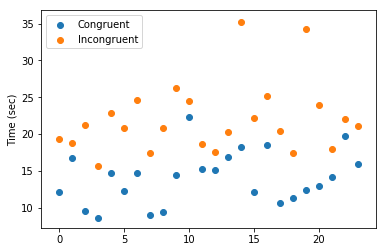

In [91]:
#绘制折线图
x = range(stroop_data['Congruent'].count())
y1 = stroop_data['Congruent']
y2 = stroop_data['Incongruent']

pyplot.scatter(x, y1, label='Congruent')
pyplot.scatter(x, y2, label='Incongruent')
pyplot.ylabel('Time (sec)')
pyplot.legend(loc = 'upper left')
pyplot.show()

上述的散点图完整地展示了一致文字条件组和非一致文字条件组的每一次结果；
* 对每一个参与者者来说，虽然各自的时间差不同，但所有参与者在非一致文字条件组都要花费更多的时间；
* 整体来看，非一致文字条件组的散点分布上在一致文字条件组的上方；这也与最初的猜想一致。


**5.现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？**      

In [89]:
#计算自由度 df
n = stroop_data['Incongruent'].count()
df = n-1
#计算标准差 standard deviation = sqrt(Σ(xi - x_bar)**2/df)
stroop_data['diff'] = stroop_data['Congruent'] - stroop_data['Incongruent']
mean_diff = np.mean(stroop_data['diff'])
stroop_data['diff_dev_square'] = (stroop_data['diff'] - mean_diff)**2
std_dev = np.sqrt(np.sum(stroop_data['diff_dev_square'])/df)
#计算t值 t-value = (x_bar - μ0)/(s/sqrt(n))
t_value = (mean_diff - 0)/(std_dev/np.sqrt(n))
#输出几个关键的统计量
print("      df\t mean_diff\t Std_dev\t t-value\t\n\
      {0:d}\t   {1:.3f}\t   {2:.3f}\t  {3:.3f}\t\n"
      .format(df,mean_diff,std_dev,t_value))

      df	 mean_diff	 Std_dev	 t-value	
      23	   -7.965	   4.865	  -8.021	



通过查表可以发现 对于df = 23 的 t检验：
* 在 $\alpha = 0.05$ 水平下，t临界值为 -2.069；
* 在 $\alpha = 0.01$ 水平下，t临界值为 -2.807；
* 在 $\alpha = 0.001$ 水平下，t临界值为 -3.768；   

而计算的 $t(value) = -8.021$,小于任何置信水平下的t临界值。    
**也就是说，在上述三个置信水平下，我们都能够成功拒绝零假设。**      
因此可以说：在一致文字条件下，人们识别出同等大小列表中词语颜色名称的时间少于不一致文字条件的情形，这也与我们最初的猜想是一致的。

In [86]:
from scipy import stats
stats.ttest_rel(stroop_data['Congruent'],stroop_data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

我们也可以通过直接调用 scipy 中 *t-test* 的函数进行*t*检验，发现 *p-value* 是一个非常小的值，得到的结论是相同的。

In [87]:
cohens_d = mean_diff/std_dev
print("cohen's d: {0:.3f}".format(cohens_d))

cohen's d: -1.637


为了了解 *Effect Size*，额外计算 *cohen's d* 的值，$cohen's\ d = -1.637$

**6.可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！**
导致_Stroop Effect_的可能原因是大脑在认知过程中遇到了矛盾，因而受到了干扰，导致认知速度变慢。
任何导致此类认知矛盾的实验都可能产生这一效应，比如箭头方向向左，上面写的词确是“右”，可能也会导致认知速度的下降。